# Lockheed Martin Corporation (LMT) Stock Analysis

In [1]:
# !pip install yfinance

In [2]:
# Importing necessary libraries and packages
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [4]:
# Downolading data from yfinance
s_data = yf.download('LMT', start='2015-01-03', end='2022-12-31')
s_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,192.899994,194.500000,188.600006,189.289993,149.647812,1506200
2015-01-06,189.619995,190.990005,186.800003,188.399994,148.944199,1205800
2015-01-07,189.320007,191.020004,189.220001,190.830002,150.865326,941900
2015-01-08,190.899994,196.880005,190.899994,195.130005,154.264816,1950900
2015-01-09,195.089996,197.070007,194.820007,195.020004,154.177887,1439500


# Strategy-1 Predict Buy or Sell Option of the stock

In [5]:
# Creating dataframe for srrategy 1
s1_df = s_data.copy() # copying dataset to a new df
s1_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,192.899994,194.500000,188.600006,189.289993,149.647812,1506200
2015-01-06,189.619995,190.990005,186.800003,188.399994,148.944199,1205800
2015-01-07,189.320007,191.020004,189.220001,190.830002,150.865326,941900
2015-01-08,190.899994,196.880005,190.899994,195.130005,154.264816,1950900
2015-01-09,195.089996,197.070007,194.820007,195.020004,154.177887,1439500


<AxesSubplot:xlabel='Date'>

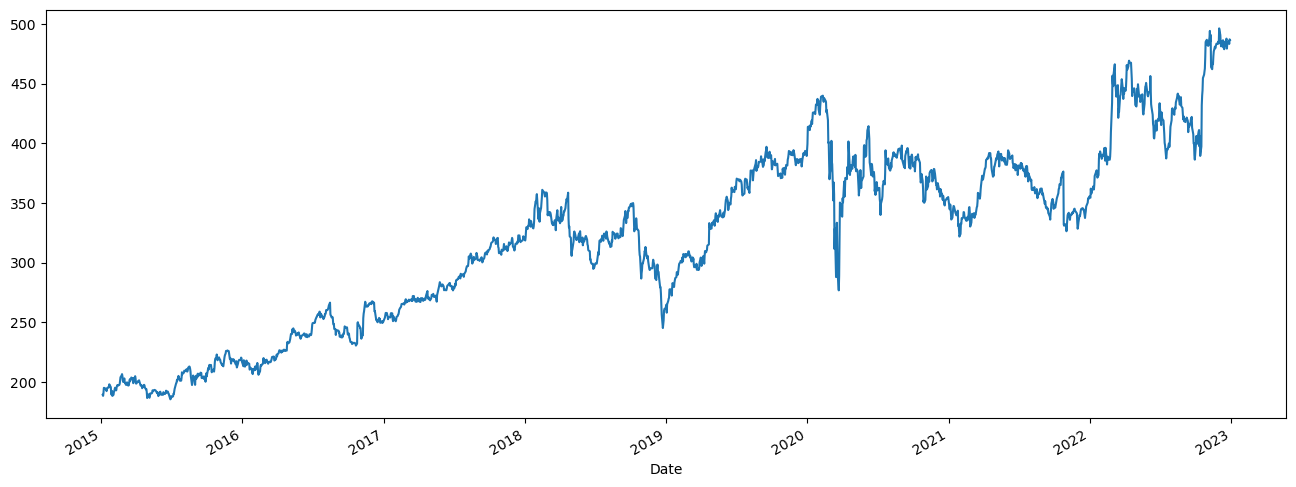

In [6]:
# Ploting Closing price of the stock
plt.figure(figsize=(16,6))
s1_df['Close'].plot(label='Close')

In [7]:
# Checking for null values
s1_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

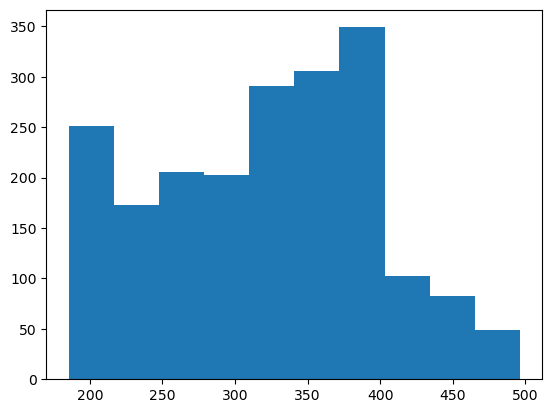

In [8]:
# Plotting hist to check distributation of closing data
plt.hist(s1_df['Close'])
plt.show()

In [9]:
# Scalling data using MinMAxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(s1_df)
scaled = scaler.fit_transform(s1_df)
scaled_df = pd.DataFrame(scaled, columns=s1_df.columns)

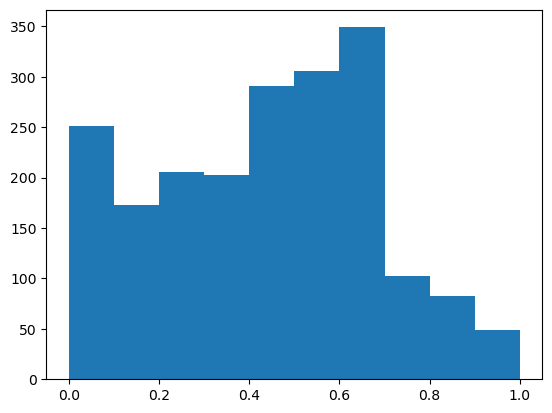

In [10]:
plt.hist(scaled_df['Close'])
plt.show()

In [11]:
# Feature selection for strategy 1
s1_df['Signal'] = np.where(s1_df['Close'].shift(-1)>s1_df['Close'],1,-1)
s1_df.head(11)

,Open,High,Low,Close,Adj Close,Volume,Signal
Date,,,,,,,
2015-01-05,192.899994,194.500000,188.600006,189.289993,149.647812,1506200,-1
2015-01-06,189.619995,190.990005,186.800003,188.399994,148.944199,1205800,1
2015-01-07,189.320007,191.020004,189.220001,190.830002,150.865326,941900,1
2015-01-08,190.899994,196.880005,190.899994,195.130005,154.264816,1950900,-1
2015-01-09,195.089996,197.070007,194.820007,195.020004,154.177887,1439500,-1
2015-01-12,195.509995,196.229996,193.710007,194.470001,153.743027,896400,-1
2015-01-13,196.139999,198.440002,192.679993,194.350006,153.648193,1095000,-1
2015-01-14,194.149994,194.240005,191.630005,193.229996,152.762741,1101100,-1
2015-01-15,194.160004,194.729996,191.850006,192.369995,152.082794,896600,1


C:\Users\pruth\AppData\Local\Temp\ipykernel_7488\2287524740.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


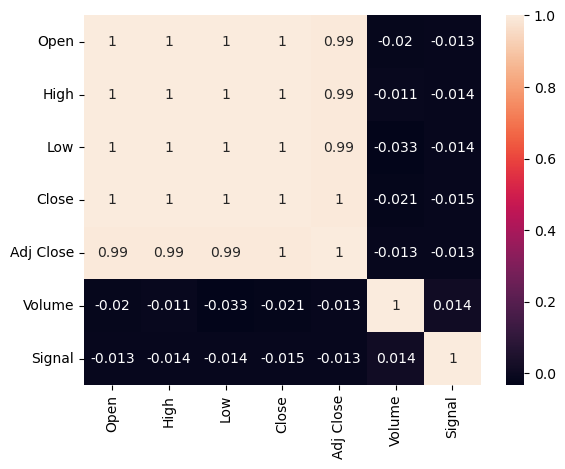

In [12]:
#Plotting Co-relation matrix
corr = s1_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.rcParams["figure.figsize"]=(2,1)
plt.show()

# Spilt the data into training and test datasets (use the 80/20 percent ratio)

In [13]:
# Defining feature variable and target variable
X1 = s1_df.drop(columns=['Signal'])
y1 = s1_df['Signal']

In [14]:
# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN) 

In [15]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X1_train, y1_train)
knn_pred = knn.predict(X1_test)
print('K-Nearest Neighbors (KNN)')
print('Accuracy : {}'.format(accuracy_score(y1_test, knn_pred)))
print(classification_report(y1_test, knn_pred))

K-Nearest Neighbors (KNN)
Accuracy : 0.5210918114143921
              precision    recall  f1-score   support

          -1       0.48      0.44      0.46       185
           1       0.55      0.59      0.57       218

    accuracy                           0.52       403
   macro avg       0.52      0.51      0.51       403
weighted avg       0.52      0.52      0.52       403



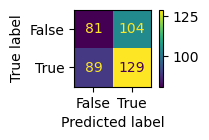

In [16]:
confusion_matrix = metrics.confusion_matrix(y1_test, knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

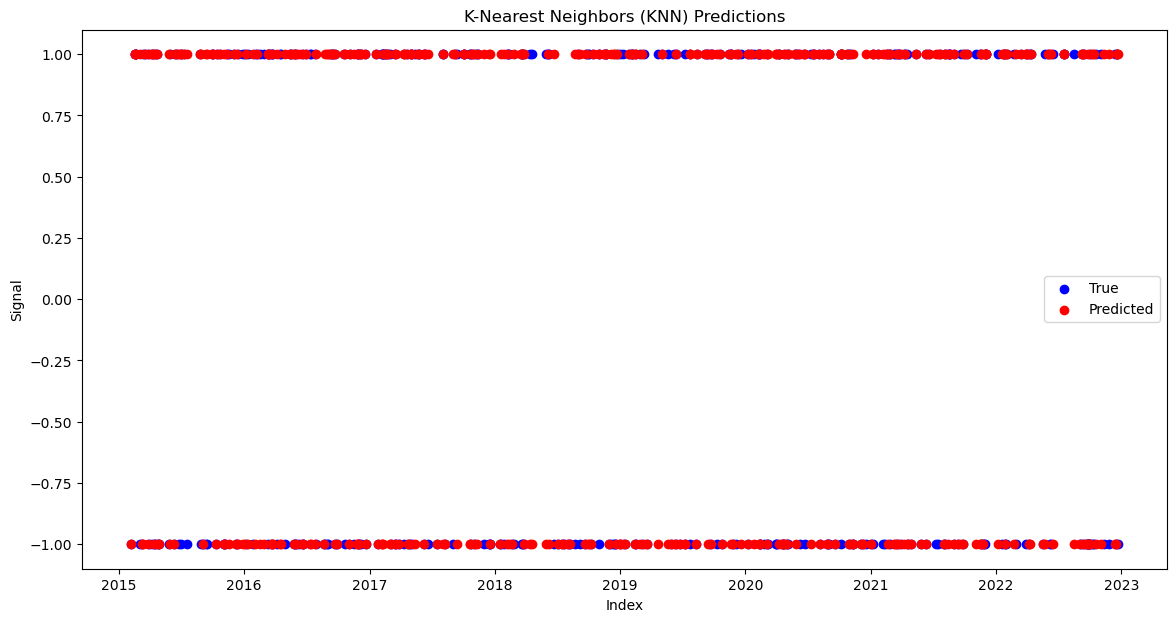

In [17]:
# Assuming 'X1_test' is your test features and 'knn_pred' is your predictions
plt.figure(figsize=(14,7))

# Plot true values
plt.scatter(X1_test.index, y1_test, color='blue', label='True')

# Plot predictions
plt.scatter(X1_test.index, knn_pred, color='red', label='Predicted')

plt.title('K-Nearest Neighbors (KNN) Predictions')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()
plt.show()

## Random Forest Classifier (RF)

In [18]:
rfc = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=100)
rfc.fit(X1_train, y1_train)
rfc_pred =rfc.predict(X1_test)
print('Random Forest Classifier (RF)')
print('Accuracy : {}'.format(accuracy_score(y1_test, rfc_pred)))
print(classification_report(y1_test, rfc_pred))

Random Forest Classifier (RF)
Accuracy : 0.5359801488833746
              precision    recall  f1-score   support

          -1       0.47      0.10      0.16       185
           1       0.54      0.91      0.68       218

    accuracy                           0.54       403
   macro avg       0.51      0.50      0.42       403
weighted avg       0.51      0.54      0.44       403



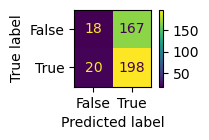

In [19]:
confusion_matrix = metrics.confusion_matrix(y1_test, rfc_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

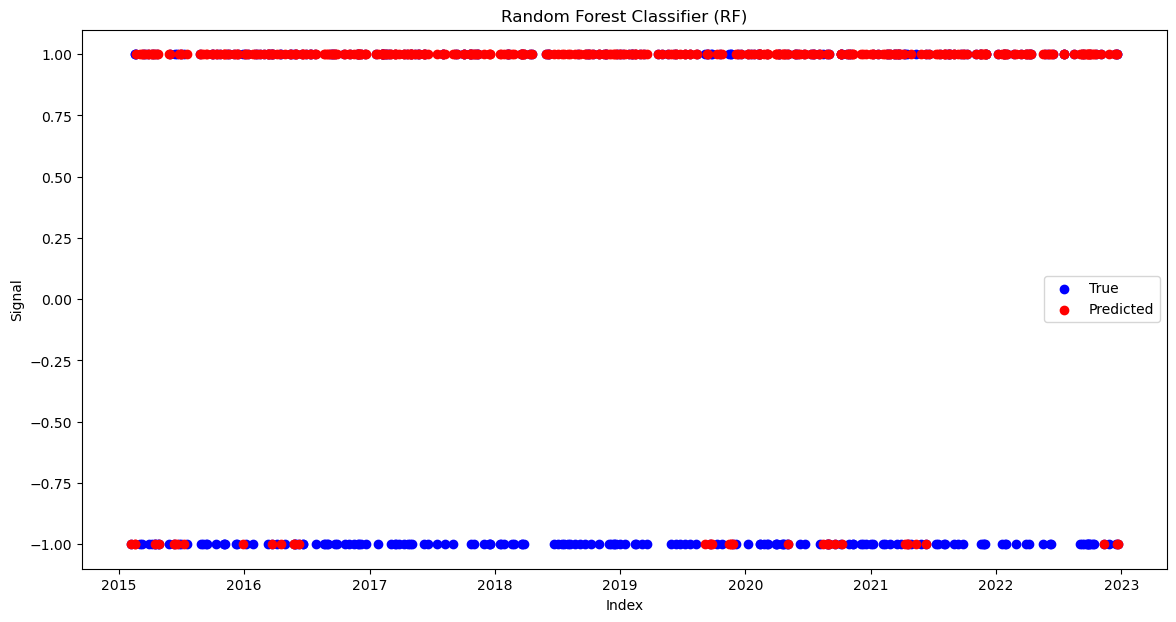

In [20]:
# Scatter plot to see True and Predicted values 
plt.figure(figsize=(14,7))
plt.scatter(X1_test.index, y1_test, color='blue', label='True')
plt.scatter(X1_test.index, rfc_pred, color='red', label='Predicted')

plt.title('Random Forest Classifier (RF)')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()
plt.show()

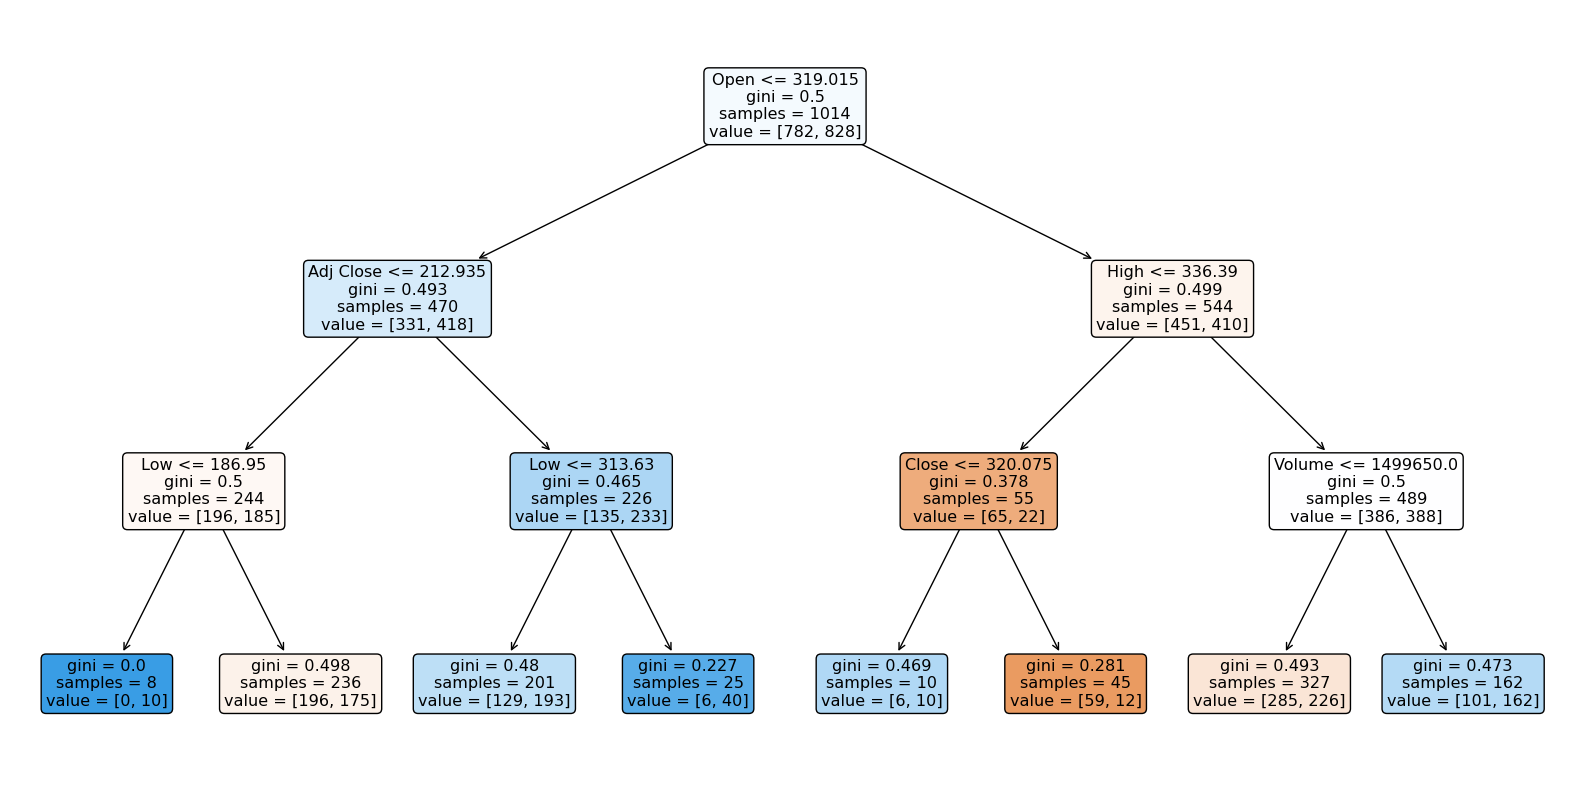

In [21]:
estimator = rfc.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(estimator, 
          filled=True, 
          rounded=True, 
          feature_names=X1_train.columns)
plt.show()

## Gradient Boosting Classifier (GB)

In [22]:
gbc = GradientBoostingClassifier(max_depth=3, random_state=0, n_estimators=100)
gbc.fit(X1_train, y1_train)
gbc_pred = gbc.predict(X1_test)
print('Gradient Boosting Classifier (GB)')
print('Accuracy : {}'.format(accuracy_score(y1_test, gbc_pred)))
print(classification_report(y1_test, gbc_pred))

Gradient Boosting Classifier (GB)
Accuracy : 0.5186104218362283
              precision    recall  f1-score   support

          -1       0.46      0.26      0.33       185
           1       0.54      0.74      0.62       218

    accuracy                           0.52       403
   macro avg       0.50      0.50      0.48       403
weighted avg       0.50      0.52      0.49       403



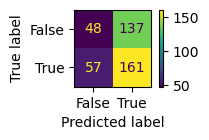

In [23]:
confusion_matrix = metrics.confusion_matrix(y1_test, gbc_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

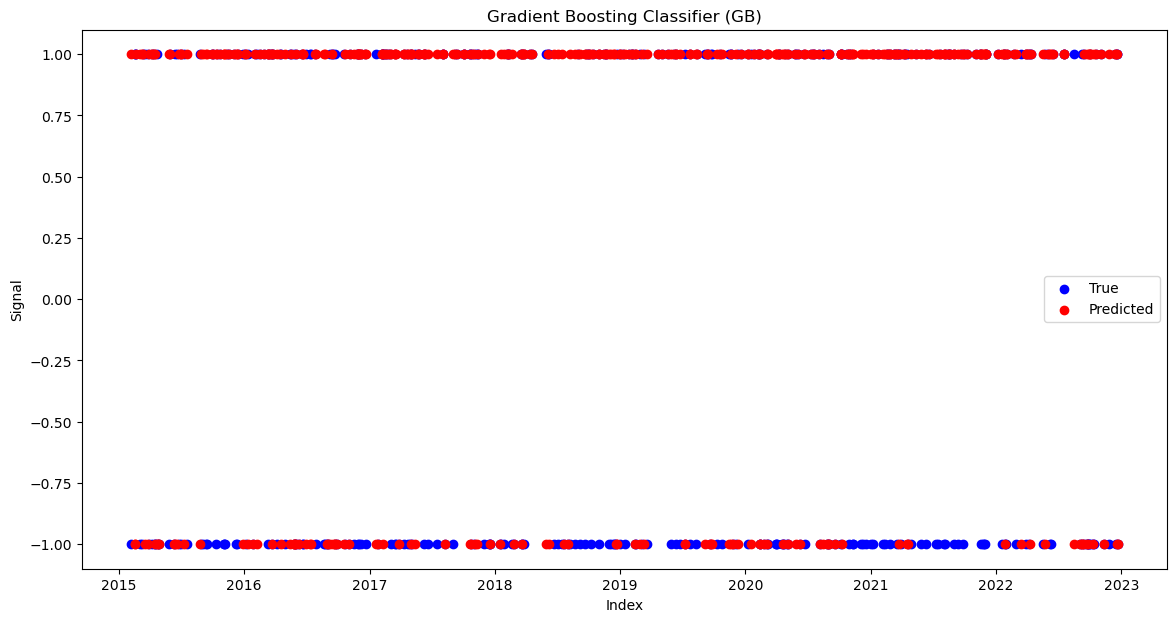

In [24]:
# Scatter plot to see True and Predicted values 
plt.figure(figsize=(14,7))
plt.scatter(X1_test.index, y1_test, color='blue', label='True')
plt.scatter(X1_test.index, gbc_pred, color='red', label='Predicted')

plt.title('Gradient Boosting Classifier (GB)')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()
plt.show()

## Support Vector Machines (SVMs)

In [25]:
svm = SVC(C=1.0, degree=3)
svm.fit(X1_train,y1_train)
svm_pred = svm.predict(X1_test)
print('Support Vector Machines (SVMs)')
print('Accuracy : {}'.format(accuracy_score(y1_test, svm_pred)))
print(classification_report(y1_test, svm_pred, zero_division=1))

Support Vector Machines (SVMs)
Accuracy : 0.5409429280397022
              precision    recall  f1-score   support

          -1       1.00      0.00      0.00       185
           1       0.54      1.00      0.70       218

    accuracy                           0.54       403
   macro avg       0.77      0.50      0.35       403
weighted avg       0.75      0.54      0.38       403



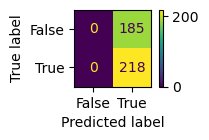

In [26]:
confusion_matrix = metrics.confusion_matrix(y1_test, svm_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

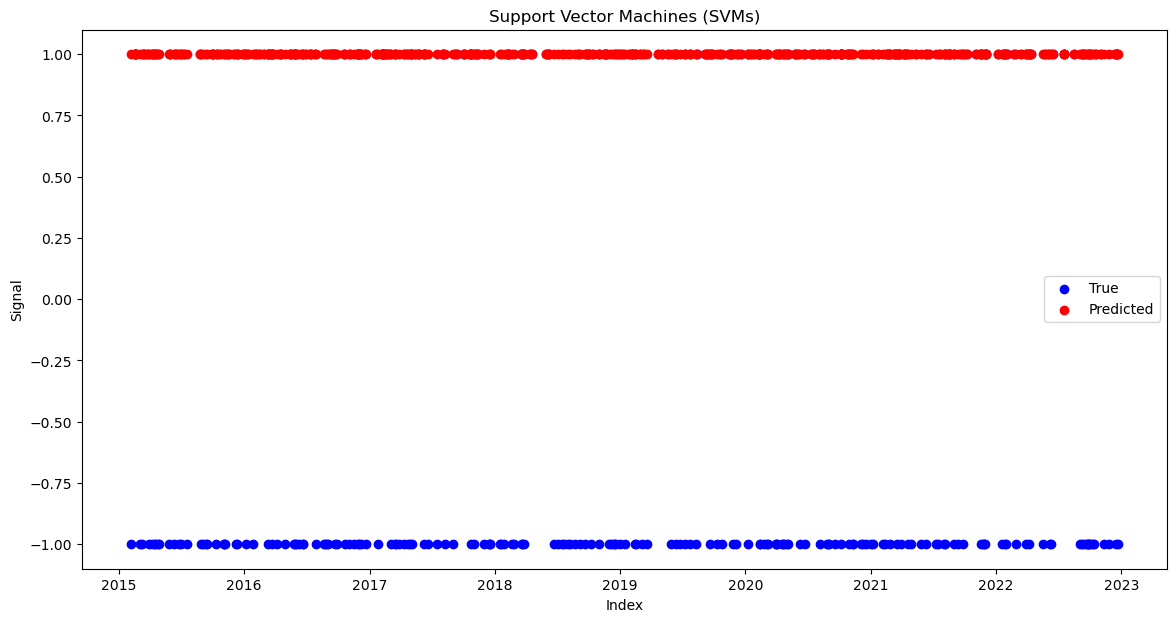

In [27]:
# Scatter plot to see True and Predicted values 
plt.figure(figsize=(14,7))
plt.scatter(X1_test.index, y1_test, color='blue', label='True')
plt.scatter(X1_test.index, svm_pred, color='red', label='Predicted')

plt.title('Support Vector Machines (SVMs)')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()
plt.show()

## XGBoost Classifier

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1_train = le.fit_transform(y1_train)
y1_test = le.transform(y1_test)

xgb=XGBClassifier()
xgb.fit(X1_train, y1_train)
xgb_pred=xgb.predict(X1_test)
print('XGBoost Classifier')
print('Accuracy : {}'.format(accuracy_score(y1_test, xgb_pred)))
print(classification_report(y1_test, xgb_pred))

XGBoost Classifier
Accuracy : 0.5310173697270472
              precision    recall  f1-score   support

           0       0.49      0.46      0.47       185
           1       0.56      0.59      0.58       218

    accuracy                           0.53       403
   macro avg       0.53      0.53      0.53       403
weighted avg       0.53      0.53      0.53       403



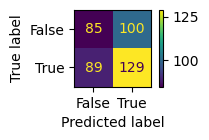

In [29]:
confusion_matrix = metrics.confusion_matrix(y1_test, xgb_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

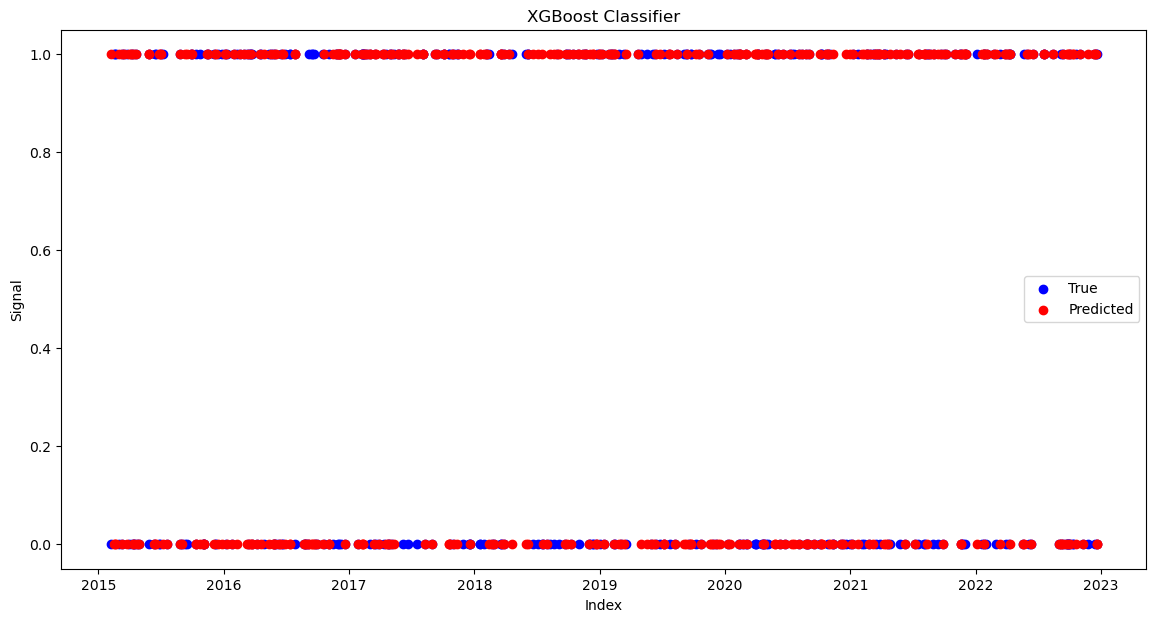

In [30]:
# Scatter plot to see True and Predicted values 
plt.figure(figsize=(14,7))
plt.scatter(X1_test.index, y1_test, color='blue', label='True')
plt.scatter(X1_test.index, xgb_pred, color='red', label='Predicted')

plt.title('XGBoost Classifier')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()
plt.show()

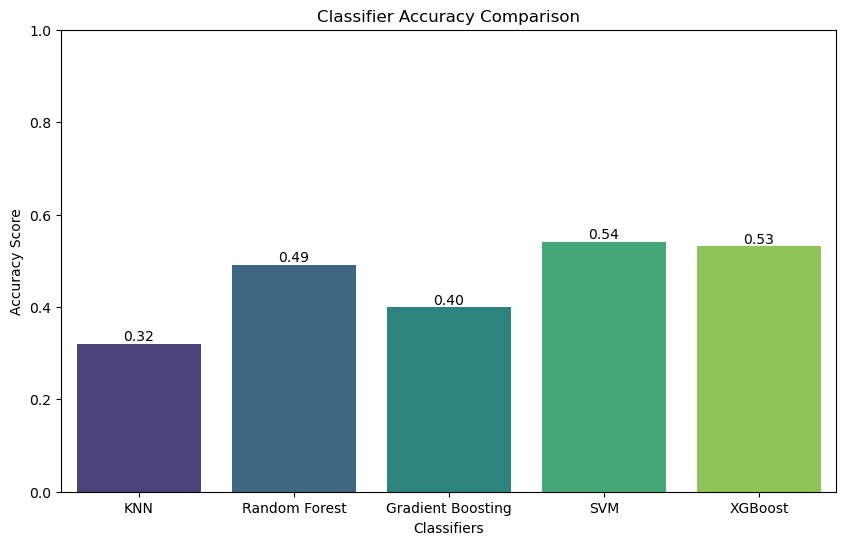

In [31]:
# Plot to compare all model accuracy scores

classifiers = ['KNN', 'Random Forest', 'Gradient Boosting', 'SVM', 'XGBoost']
accuracy_scores = [accuracy_score(y1_test, knn_pred),
                   accuracy_score(y1_test, rfc_pred),
                   accuracy_score(y1_test, gbc_pred),
                   accuracy_score(y1_test, svm_pred),
                   accuracy_score(y1_test, xgb_pred)]

data = {'Classifiers': classifiers, 'Accuracy Scores': accuracy_scores}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Classifiers', y='Accuracy Scores', data=df, palette='viridis')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Classifier Accuracy Comparison')

for index, value in enumerate(accuracy_scores):
    plt.text(index, value, '{:.2f}'.format(value), ha='center', va='bottom')

plt.ylim(0, 1)
plt.show()


# SVM classifier gave better accuracy results compared to other models.

## Startegy-2 Moving Average of 50/200 days

In [32]:
# Copying data to new data frame called s2_df 
s2_df = s_data.copy()
s2_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,192.899994,194.500000,188.600006,189.289993,149.647812,1506200
2015-01-06,189.619995,190.990005,186.800003,188.399994,148.944199,1205800
2015-01-07,189.320007,191.020004,189.220001,190.830002,150.865326,941900
2015-01-08,190.899994,196.880005,190.899994,195.130005,154.264816,1950900
2015-01-09,195.089996,197.070007,194.820007,195.020004,154.177887,1439500
...,...,...,...,...,...,...
2022-12-23,479.500000,484.179993,478.359985,483.290009,473.886566,661600
2022-12-27,485.000000,489.239990,483.500000,485.500000,476.053558,788800
2022-12-28,486.149994,489.000000,482.899994,483.220001,473.817932,810300


In [33]:
s2_df['MA-50']=s2_df['Close'].rolling(window=50).mean()
s2_df['MA-200']=s2_df['Close'].rolling(window=200).mean()

s2_df['Signal-MA'] = 0
s2_df.loc[s2_df['MA-50']>s2_df['MA-200'], 'Signal-MA']=1
s2_df.loc[s2_df['MA-50']<s2_df['MA-200'],'Signal-MA']=-1
s2_df.head()

,Open,High,Low,Close,Adj Close,Volume,MA-50,MA-200,Signal-MA
Date,,,,,,,,,
2015-01-05,192.899994,194.500000,188.600006,189.289993,149.647812,1506200,NaN,NaN,0
2015-01-06,189.619995,190.990005,186.800003,188.399994,148.944199,1205800,NaN,NaN,0
2015-01-07,189.320007,191.020004,189.220001,190.830002,150.865326,941900,NaN,NaN,0
2015-01-08,190.899994,196.880005,190.899994,195.130005,154.264816,1950900,NaN,NaN,0
2015-01-09,195.089996,197.070007,194.820007,195.020004,154.177887,1439500,NaN,NaN,0


In [34]:
s2_df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
MA-50         49
MA-200       199
Signal-MA      0
dtype: int64

In [35]:
s2_df.shape

(2013, 9)

In [36]:
s2_df.dropna(inplace=True)
s2_df.shape

(1814, 9)

In [37]:
s2_df

,Open,High,Low,Close,Adj Close,Volume,MA-50,MA-200,Signal-MA
Date,,,,,,,,,
2015-10-19,209.240005,210.729996,208.500000,210.639999,170.324005,1329900,206.879998,198.705750,1
2015-10-20,207.380005,209.550003,205.139999,208.729996,168.779587,1926500,206.838998,198.802950,1
2015-10-21,209.759995,213.160004,208.740005,211.559998,171.067978,1332400,206.892998,198.918750,1
2015-10-22,212.220001,216.990005,212.220001,216.509995,175.070496,1190100,207.047598,199.047150,1
2015-10-23,218.000000,219.419998,217.229996,219.320007,177.342712,1280900,207.238198,199.168100,1
...,...,...,...,...,...,...,...,...,...
2022-12-23,479.500000,484.179993,478.359985,483.290009,473.886566,661600,473.913799,439.432049,1
2022-12-27,485.000000,489.239990,483.500000,485.500000,476.053558,788800,475.835599,439.664349,1
2022-12-28,486.149994,489.000000,482.899994,483.220001,473.817932,810300,477.553799,439.858199,1


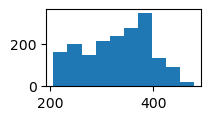

In [38]:
plt.hist(s2_df['MA-50'])
plt.show()

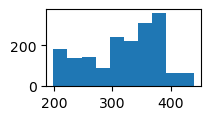

In [39]:
plt.hist(s2_df['MA-200'])
plt.show()

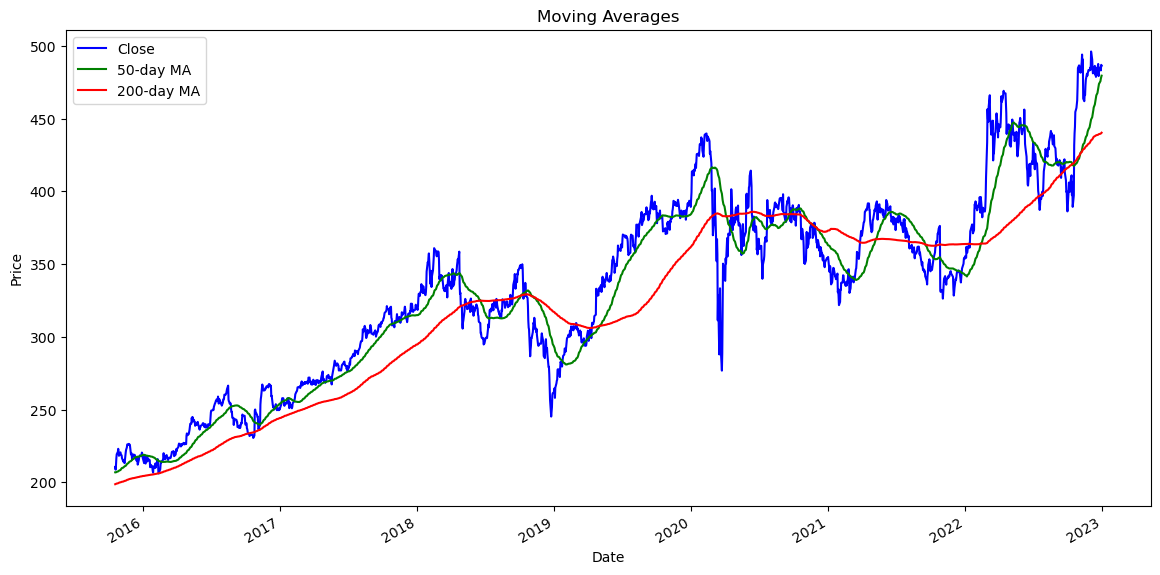

In [40]:
# Plot for comparing 50 days and 200 days Moving Averages
plt.figure(figsize=(14,7))
s2_df['Close'].plot(label='Close', color='blue')
s2_df['MA-50'].plot(label='50-day MA', color='green')
s2_df['MA-200'].plot(label='200-day MA', color='red')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
# Defining feature variable and target variable
X2 = s2_df.drop(columns=['Signal-MA']) 
y2 = s2_df['Signal-MA']

In [42]:
# Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

## K-Nearest Neighbors (KNN)

In [43]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train, y2_train)
knn2_pred = knn2.predict(X2_test)
print('K-Nearest Neighbors (KNN)')
print('Accuracy : {}'.format(accuracy_score(y2_test, knn2_pred)))
print(classification_report(y2_test, knn2_pred))

K-Nearest Neighbors (KNN)
Accuracy : 0.6308539944903582
              precision    recall  f1-score   support

          -1       0.38      0.24      0.29       117
           1       0.69      0.82      0.75       246

    accuracy                           0.63       363
   macro avg       0.54      0.53      0.52       363
weighted avg       0.59      0.63      0.60       363



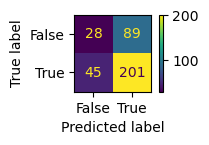

In [44]:
confusion_matrix = metrics.confusion_matrix(y2_test, knn2_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

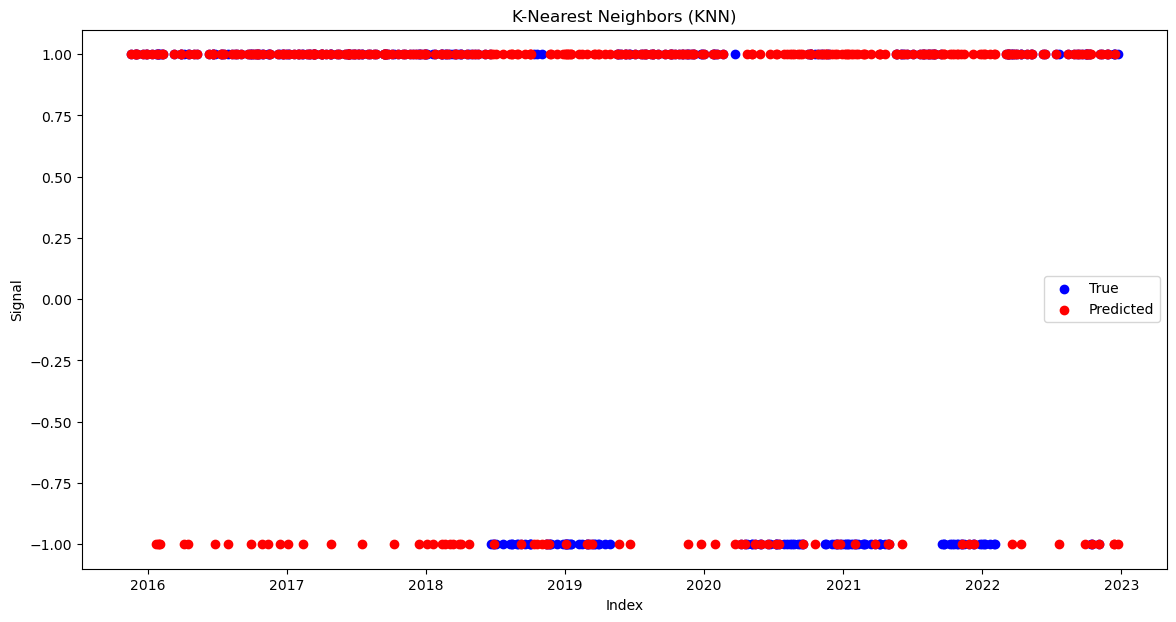

In [45]:
# Scatter plot to see True and Predicted values 
plt.figure(figsize=(14,7))
plt.scatter(X2_test.index, y2_test, color='blue', label='True')
plt.scatter(X2_test.index, knn2_pred, color='red', label='Predicted')

plt.title('K-Nearest Neighbors (KNN)')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()
plt.show()

## Random Forest Classifier (RF)

In [46]:
rfc2 = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=100)
rfc2.fit(X2_train, y2_train)
rfc2_pred =rfc2.predict(X2_test)
print('Random Forest Classifier (RF)')
print('Accuracy : {}'.format(accuracy_score(y2_test, rfc2_pred)))
print(classification_report(y2_test, rfc2_pred))

Random Forest Classifier (RF)
Accuracy : 0.8732782369146006
              precision    recall  f1-score   support

          -1       0.79      0.82      0.81       117
           1       0.91      0.90      0.91       246

    accuracy                           0.87       363
   macro avg       0.85      0.86      0.86       363
weighted avg       0.87      0.87      0.87       363



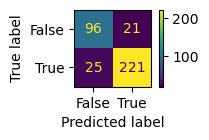

In [47]:
confusion_matrix = metrics.confusion_matrix(y2_test, rfc2_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

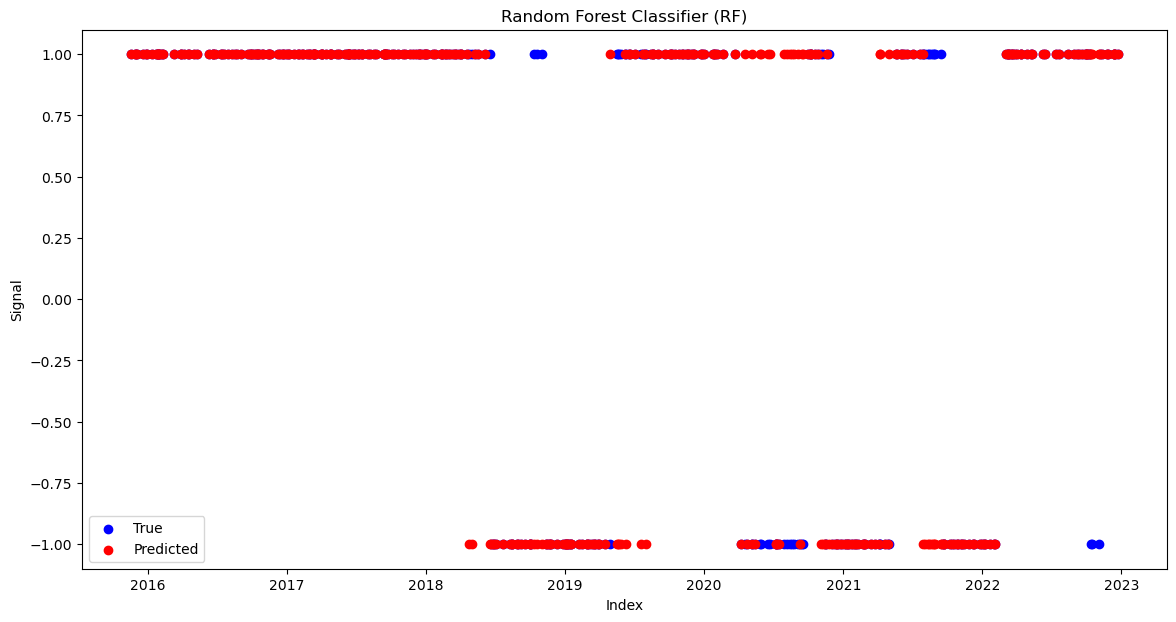

In [48]:
# Scatter plot to see True and Predicted values 
plt.figure(figsize=(14,7))
plt.scatter(X2_test.index, y2_test, color='blue', label='True')
plt.scatter(X2_test.index, rfc2_pred, color='red', label='Predicted')

plt.title('Random Forest Classifier (RF)')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()
plt.show()

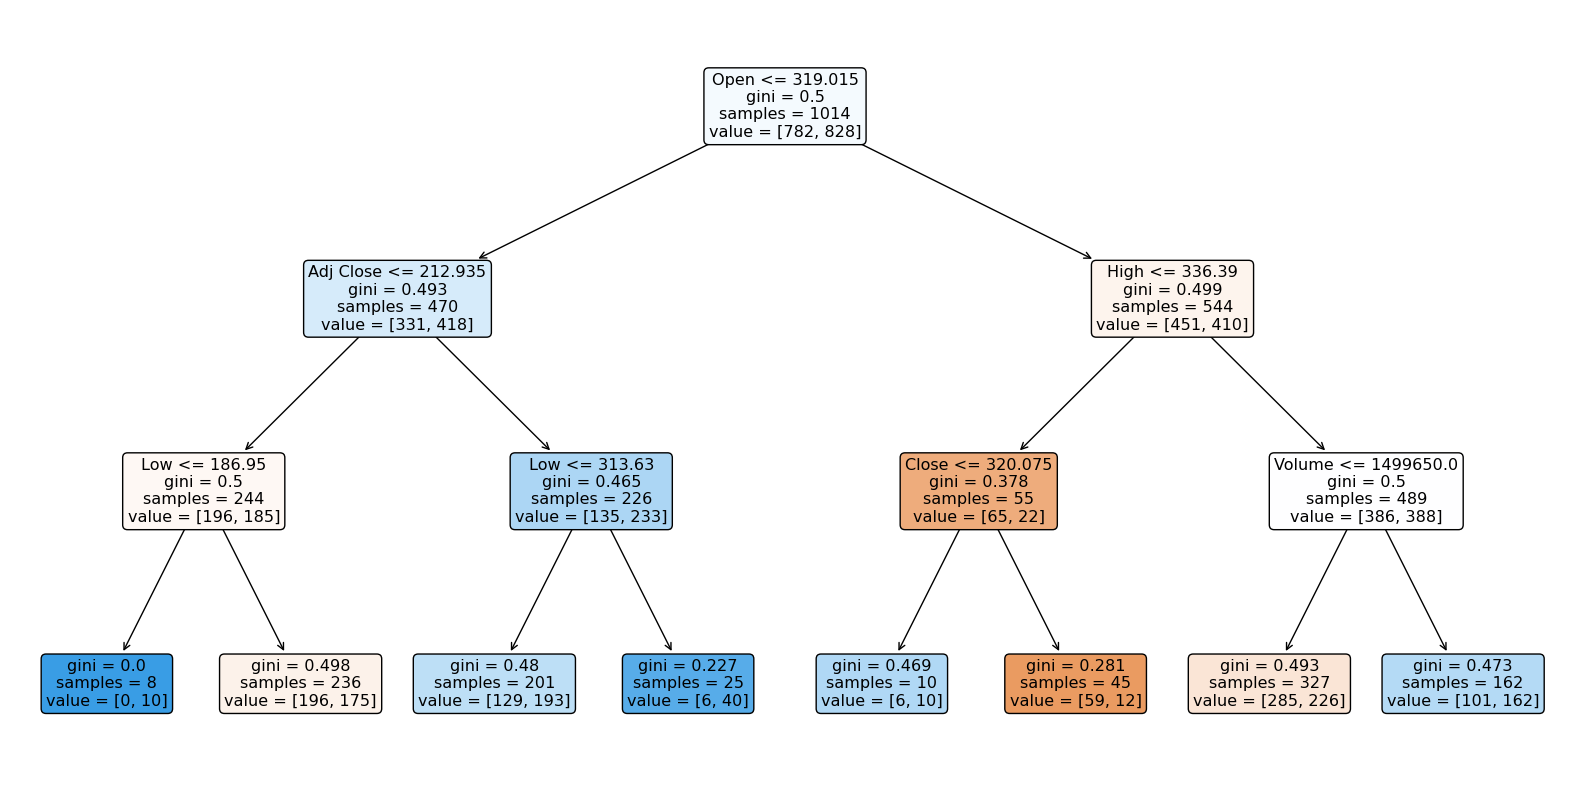

In [49]:
estimator = rfc.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(estimator, 
          filled=True, 
          rounded=True, 
          feature_names=X2_train.columns)
plt.show()

## Gradient Boosting Classifier (GB)

In [50]:
gbc2 = GradientBoostingClassifier(max_depth=3, random_state=0, n_estimators=100)
gbc2.fit(X2_train, y2_train)
gbc2_pred = gbc2.predict(X2_test)
print('Gradient Boosting Classifier (GB)')
print('Accuracy : {}'.format(accuracy_score(y2_test, gbc2_pred)))
print(classification_report(y2_test, gbc2_pred))

Gradient Boosting Classifier (GB)
Accuracy : 0.9862258953168044
              precision    recall  f1-score   support

          -1       0.97      0.98      0.98       117
           1       0.99      0.99      0.99       246

    accuracy                           0.99       363
   macro avg       0.98      0.99      0.98       363
weighted avg       0.99      0.99      0.99       363



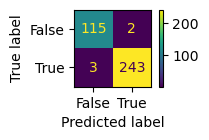

In [51]:
confusion_matrix = metrics.confusion_matrix(y2_test, gbc2_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

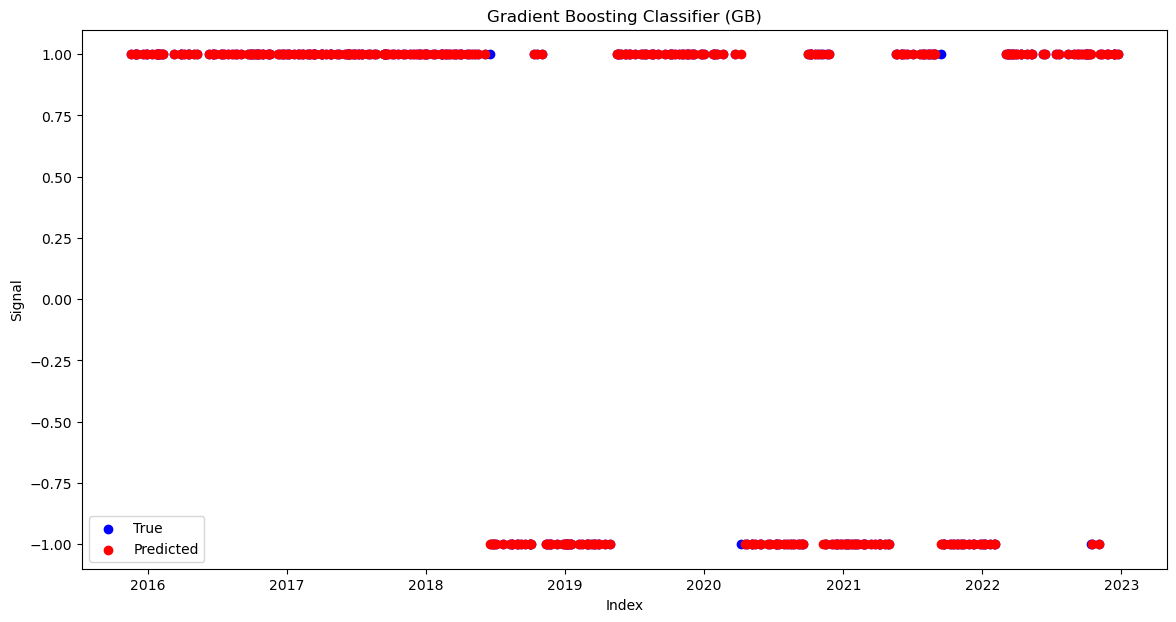

In [52]:
# Scatter plot to see True and Predicted values 
plt.figure(figsize=(14,7))
plt.scatter(X2_test.index, y2_test, color='blue', label='True')
plt.scatter(X2_test.index, gbc2_pred, color='red', label='Predicted')

plt.title('Gradient Boosting Classifier (GB)')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()
plt.show()

# Support Vector Machines (SVMs)

In [53]:
svm2 = SVC(C=1.0, degree=3)
svm2.fit(X2_train,y2_train)
svm2_pred = svm2.predict(X2_test)
print('Support Vector Machines (SVMs)')
print('Accuracy : {}'.format(accuracy_score(y2_test, svm2_pred)))
print(classification_report(y2_test, svm2_pred, zero_division=1))

Support Vector Machines (SVMs)
Accuracy : 0.6776859504132231
              precision    recall  f1-score   support

          -1       1.00      0.00      0.00       117
           1       0.68      1.00      0.81       246

    accuracy                           0.68       363
   macro avg       0.84      0.50      0.40       363
weighted avg       0.78      0.68      0.55       363



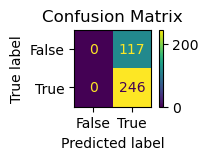

In [54]:
confusion_matrix = metrics.confusion_matrix(y2_test, svm2_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

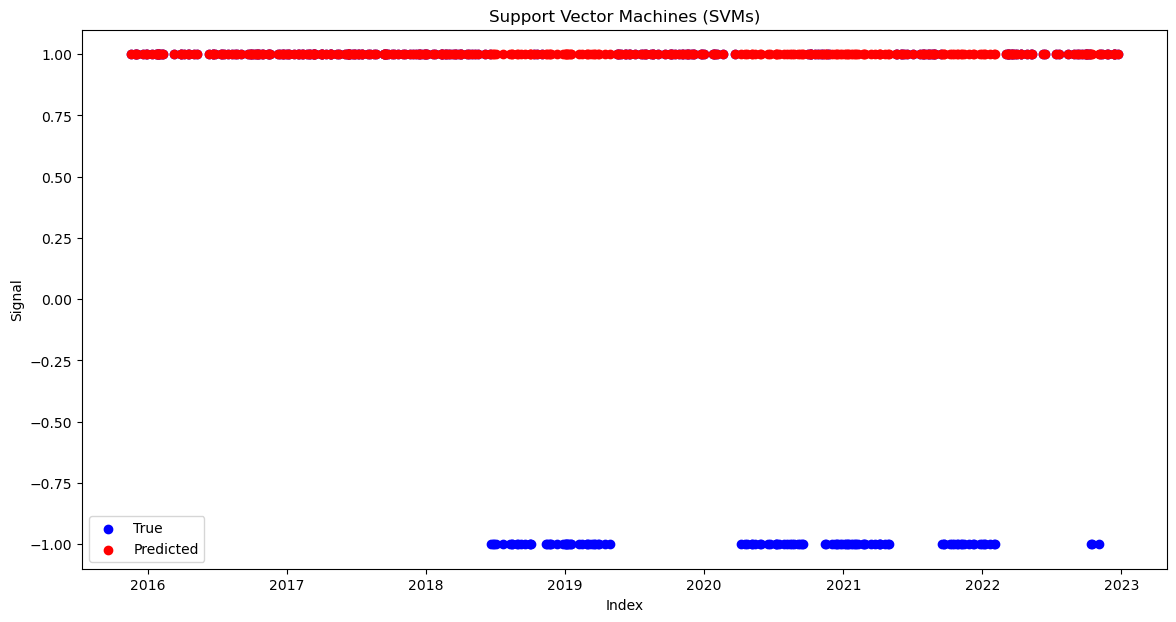

In [55]:
# Scatter plot to see True and Predicted values 
plt.figure(figsize=(14,7))
plt.scatter(X2_test.index, y2_test, color='blue', label='True')
plt.scatter(X2_test.index, svm2_pred, color='red', label='Predicted')

plt.title('Support Vector Machines (SVMs)')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()
plt.show()

## XGBoost Classifier

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y2_train = le.fit_transform(y2_train)
y2_test = le.transform(y2_test)

In [57]:
from xgboost import XGBClassifier
xgb2=XGBClassifier()
xgb2.fit(X2_train, y2_train)
xgb2_pred=xgb2.predict(X2_test)
print('XGBoost Classifier')
print('Accuracy : {}'.format(accuracy_score(y2_test, xgb2_pred)))
print(classification_report(y2_test, xgb2_pred))

XGBoost Classifier
Accuracy : 0.9862258953168044
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       117
           1       0.99      0.99      0.99       246

    accuracy                           0.99       363
   macro avg       0.98      0.99      0.98       363
weighted avg       0.99      0.99      0.99       363



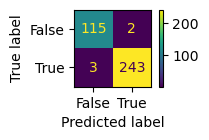

In [58]:
confusion_matrix = metrics.confusion_matrix(y2_test, xgb2_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

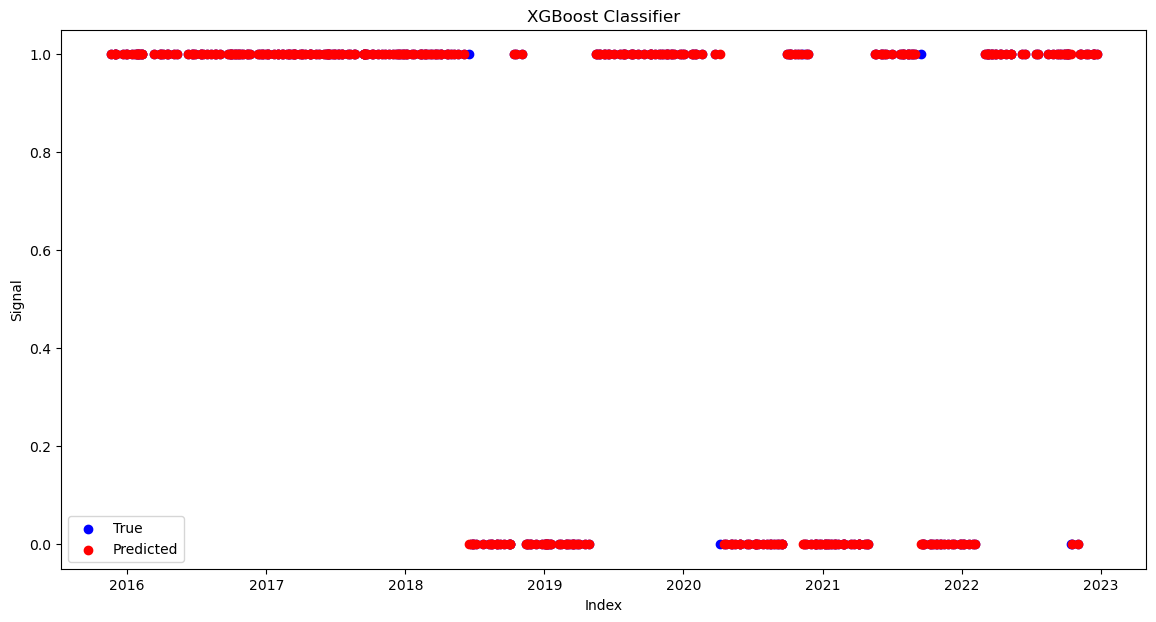

In [59]:
# Scatter plot to see True and Predicted values 
plt.figure(figsize=(14,7))
plt.scatter(X2_test.index, y2_test, color='blue', label='True')
plt.scatter(X2_test.index, xgb2_pred, color='red', label='Predicted')

plt.title('XGBoost Classifier')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()
plt.show()

# K-Nearest Neighbors (KNN): 
Accuracy : 0.6308539944903582

# Random Forest Classifier (RF)
Accuracy : 0.8732782369146006

# Gradient Boosting Classifier (GB)
Accuracy : 0.9862258953168044

# Support Vector Machines (SVMs)
Accuracy : 0.6776859504132231

# XGBoost Classifier
Accuracy : 0.9862258953168044

For strategy-2 out of all the five classifiers Gradient Boosting Classifier (GB) & XGBoost Classifier performed similar and returned same accuracy which is 0.9862258953168044

# Extra Credit 

# Hyperparameter Tuning for Strategy_1 Gradient Boosting Model  using GridsearchCV  

# Tuning - 1

In [60]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}
gbc = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)
grid_search.fit(X1_train, y1_train)

print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}


In [61]:
gbc_best = grid_search.best_estimator_
gbc_pred = gbc_best.predict(X1_test)

print('Gradient Boosting Classifier (GB) - Tuned')
print('Accuracy: {:.2f}'.format(accuracy_score(y1_test, gbc_pred)))

Gradient Boosting Classifier (GB) - Tuned
Accuracy: 0.52


# Tuning - 2

In [62]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}
gbc = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=10)
grid_search.fit(X1_train, y1_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


In [63]:
gbc_best = grid_search.best_estimator_
gbc_pred = gbc_best.predict(X1_test)

print('Gradient Boosting Classifier (GB) - Tuned')
print('Accuracy: {:.2f}'.format(accuracy_score(y1_test, gbc_pred)))

Gradient Boosting Classifier (GB) - Tuned
Accuracy: 0.54


# Actual

Gradient Boosting Classifier (GB)

Accuracy : 0.5186104218362283

# Tuned-1:

Gradient Boosting Classifier (GB) - Tuned

Accuracy: 0.52

# Tuned-2:

Gradient Boosting Classifier (GB) - Tuned

Accuracy: 0.54

# Strategy-2 Model Tunning for Gradient Boosting Classifier

In [64]:
# Defining the parameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 4, 5], 
    'min_samples_split': [2, 3, 4]
}

In [65]:
gbc = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X2_train, y2_train)
best_params = grid_search.best_params_
best_gbc = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 150}


In [66]:
gbc_pred = best_gbc.predict(X2_test)

print('Gradient Boosting Classifier (GB) - After Tuning')
print('Accuracy : {}'.format(accuracy_score(y2_test, gbc_pred)))

Gradient Boosting Classifier (GB) - After Tuning
Accuracy : 0.9889807162534435


# Actual:
Gradient Boosting Classifier (GB)
Accuracy : 0.9862258953168044

# Tuned:
Gradient Boosting Classifier (GB)
Accuracy : 0.9889807162534435

After tunning the Gradient Boosting Classifier model for strategy-2 their is no significant improvemnet in the accuracy.

# XGBoost Model Tunning

In [67]:
# Defining the parameters
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],  
    'min_child_weight': [1, 2, 3], 
    'subsample': [0.8, 0.9, 1.0],  
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb = XGBClassifier(random_state=0)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [68]:
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}


In [69]:
xgb_pred = best_xgb.predict(X2_test)

print('XGBoost Classifier - After Tuning')
print('Accuracy : {}'.format(accuracy_score(y2_test, xgb_pred)))

XGBoost Classifier - After Tuning
Accuracy : 0.9862258953168044


# Actual:
XGBoost Classifier
Accuracy : 0.9862258953168044

# Tuned:
XGBoost Classifier - After Tuning
Accuracy : 0.9862258953168044

XGB dosen't improve after tuning it showed the same accuracy results as we can see above.

Overall, Strategy 2 performed much better than Strategy 1 in the comparison of the two strategies. Strategy 2 in particular produced a significantly better accuracy rates, demonstrating its efficacy and resilience. The higher accuracy indicates that Strategy 2's approach to the problem was more effective, resulting in more precise and dependable forecasts. As a result of its outstanding accuracy, Strategy 2 emerges as the preferable option, stressing its potential for real-world applications.